In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

In [2]:
s = pd.Series([1,3,6,np.nan,44,1])
s

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64

DataFrame 数据生成方式1

In [12]:
datas = pd.date_range('20160101',periods=6)
print(datas,'\n')
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df,'\n')
print(df['c'])

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D') 

                   a         b         c         d
2016-01-01  2.047288  0.584007  0.272566  0.266895
2016-01-02 -0.222674 -0.971940 -1.697776 -0.538577
2016-01-03  1.002105  0.747370  2.268106 -0.271235
2016-01-04  1.781988  0.659271  2.187842  0.898205
2016-01-05  1.267450 -0.308573 -0.452299 -0.510549
2016-01-06  0.113953  0.422956  0.366151  1.352900 

2016-01-01    0.272566
2016-01-02   -1.697776
2016-01-03    2.268106
2016-01-04    2.187842
2016-01-05   -0.452299
2016-01-06    0.366151
Freq: D, Name: c, dtype: float64


DataFrame 数据生成方式2

In [14]:
df1 = pd.DataFrame(np.random.randn(1,12).reshape((4,3)))
print(df1)

          0         1         2
0  0.738662 -1.811581 -0.316849
1 -1.291523  1.187889 -1.074462
2 -0.036414 -0.108560 -1.522276
3  0.237332  0.595724 -0.708886


DataFrame 数据生成方式1

In [18]:
df2 = pd.DataFrame({
    'A':1.,
    'B':pd.Series(1,index=list(range(4)),dtype='float32'),
    'C':np.array([3]*4,dtype='int32'),
    'D':pd.Categorical(['test','train','test2','train2']),
    'E':pd.Timestamp('20190301'),
    'F':'foo'
})
print(df2,'\n')
print(df2.dtypes,'\n')
print(df2.T)

     A    B  C       D          E    F
0  1.0  1.0  3    test 2019-03-01  foo
1  1.0  1.0  3   train 2019-03-01  foo
2  1.0  1.0  3   test2 2019-03-01  foo
3  1.0  1.0  3  train2 2019-03-01  foo 

A           float64
B           float32
C             int32
D          category
E    datetime64[ns]
F            object
dtype: object 

                     0                    1                    2  \
A                    1                    1                    1   
B                    1                    1                    1   
C                    3                    3                    3   
D                 test                train                test2   
E  2019-03-01 00:00:00  2019-03-01 00:00:00  2019-03-01 00:00:00   
F                  foo                  foo                  foo   

                     3  
A                    1  
B                    1  
C                    3  
D               train2  
E  2019-03-01 00:00:00  
F                  foo  


DataFrame 数据选取方式

In [34]:
from pandas import DataFrame as DF
df3 = DF(np.arange(24).reshape((6,4)),index=pd.date_range('20190301',periods=6),columns=['A','B','C','D'])
df3
df3['A']
df3.B
df3[0:2]
df3['20190302':'20190303']

,A,B,C,D
2019-03-01,0,1,2,3
2019-03-02,4,5,6,7
2019-03-03,8,9,10,11
2019-03-04,12,13,14,15
2019-03-05,16,17,18,19
2019-03-06,20,21,22,23


2019-03-01     0
2019-03-02     4
2019-03-03     8
2019-03-04    12
2019-03-05    16
2019-03-06    20
Freq: D, Name: A, dtype: int64

2019-03-01     1
2019-03-02     5
2019-03-03     9
2019-03-04    13
2019-03-05    17
2019-03-06    21
Freq: D, Name: B, dtype: int64

,A,B,C,D
2019-03-01,0,1,2,3
2019-03-02,4,5,6,7


,A,B,C,D
2019-03-02,4,5,6,7
2019-03-03,8,9,10,11


使用标签来选择数据

In [38]:
df3.loc['20190302']
df3.loc[:,'B':'D']
df3.loc['20190301':'20190302','C':'D']

A    4
B    5
C    6
D    7
Name: 2019-03-02 00:00:00, dtype: int64

,B,C,D
2019-03-01,1,2,3
2019-03-02,5,6,7
2019-03-03,9,10,11
2019-03-04,13,14,15
2019-03-05,17,18,19
2019-03-06,21,22,23


,C,D
2019-03-01,2,3
2019-03-02,6,7


使用位置来选择数据

In [39]:
df3.iloc[1:3,0:1]

,A
2019-03-02,4
2019-03-03,8


混合使用 以上两种方法

In [42]:
df3.ix[2:4,'B':'C']

/home/egod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,B,C
2019-03-03,9,10
2019-03-04,13,14


使用布尔方法

In [43]:
df3[df3.B>10]

,A,B,C,D
2019-03-04,12,13,14,15
2019-03-05,16,17,18,19
2019-03-06,20,21,22,23


修改DataFrame中的值

In [47]:
df3
df3.iloc[2,2]=111
df3
df3.loc['20190301','C']=202
df3
df3[df3.A>8]=0
df3
df3['B']='s'
df3
df3.loc['20190302',:]='b'
df3

,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,4,s,6,7,B
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,4,s,6,7,B
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,4,s,6,7,B
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,4,s,6,7,B
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,4,s,6,7,B
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


,A,B,C,D,20190302
2019-03-01,0,s,202,3,B
2019-03-02,b,b,b,b,b
2019-03-03,0,s,111,0,B
2019-03-04,0,s,0,0,B
2019-03-05,0,s,0,0,B
2019-03-06,0,s,0,0,B


添加数据

In [48]:
df3['X']='B'
df3

,A,B,C,D,20190302,X
2019-03-01,0,s,202,3,B,B
2019-03-02,b,b,b,b,b,B
2019-03-03,0,s,111,0,B,B
2019-03-04,0,s,0,0,B,B
2019-03-05,0,s,0,0,B,B
2019-03-06,0,s,0,0,B,B


pandas处理丢失数据（NaN)

In [50]:
df = DF(np.arange(24).reshape((6,4)),index=pd.date_range('20190301',periods=6),columns=['A','B','C','D'])
df.iloc[1,1]=np.nan
df.iloc[3,3]=np.nan
df

,A,B,C,D
2019-03-01,0,1.0,2,3.0
2019-03-02,4,NaN,6,7.0
2019-03-03,8,9.0,10,11.0
2019-03-04,12,13.0,14,NaN
2019-03-05,16,17.0,18,19.0
2019-03-06,20,21.0,22,23.0


直接去掉含有NaN的行和列

In [53]:
df1=df
df1.dropna(
    axis = 0, # 0是按行操作，1是按列操作
    how = 'any', # 'any'是只要有NaN就去掉，‘all'是全部为NaN才去掉
)
df1.dropna(
    axis = 1,
    how = 'any',
)

,A,B,C,D
2019-03-01,0,1.0,2,3.0
2019-03-03,8,9.0,10,11.0
2019-03-05,16,17.0,18,19.0
2019-03-06,20,21.0,22,23.0


,A,C
2019-03-01,0,2
2019-03-02,4,6
2019-03-03,8,10
2019-03-04,12,14
2019-03-05,16,18
2019-03-06,20,22


替换调NaN项

In [55]:
df1 = df
df1.fillna(value='lsy')

,A,B,C,D
2019-03-01,0,1,2,3
2019-03-02,4,lsy,6,7
2019-03-03,8,9,10,11
2019-03-04,12,13,14,lsy
2019-03-05,16,17,18,19
2019-03-06,20,21,22,23


判断是否有数据缺失

In [58]:
df1 = df
df1.isnull()
np.any(df1.isnull()) == True  # 检查一堆数据里面是否有缺失

,A,B,C,D
2019-03-01,False,False,False,False
2019-03-02,False,True,False,False
2019-03-03,False,False,False,False
2019-03-04,False,False,False,True
2019-03-05,False,False,False,False
2019-03-06,False,False,False,False


True

panda可读取cvs,excel,json,html,pickle等文件
以excel为例

In [2]:
data = pd.read_excel('./data1.xlsx')
data

,x1,y1
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


将资料储存为pickle

In [3]:
data.to_pickle('./data1.pickle')

pandas 的合并功能

In [5]:
df1 = pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])

df = pd.concat([df1,df2,df3],axis=0)
df

df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df

df = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
df

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


append，添加到下面，只能纵向

In [6]:
df = df1.append(df2,ignore_index=True)
df

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


merge 操作，用于合并相同  column 的数据

In [7]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
left
right
pd.merge(left,right,on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


依多组 key 进行 merge

In [9]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
left
right
pd.merge(left,right,on=['key1','key2'],how='inner')
pd.merge(left,right,on=['key1','key2'],how='outer')
pd.merge(left,right,on=['key1','key2'],how='outer',indicator=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
5,K2,K0,NaN,NaN,C3,D3,right_only


pandas 可视化

0     -0.554456
1      0.878665
2      0.875882
3      0.520387
4      1.869670
5      1.810309
6      0.738829
7     -0.512415
8      0.902608
9      0.379393
10     1.001827
11     1.106804
12     1.011380
13     0.354028
14    -0.019389
15     1.551352
16     1.687286
17     1.202526
18    -1.565827
19     0.799297
20     1.526807
21    -0.161740
22    -0.321489
23    -0.984232
24    -0.905171
25    -0.969163
26    -0.223328
27     0.154966
28    -0.057433
29    -0.235655
         ...   
970   -0.311444
971   -0.268374
972   -0.527175
973   -1.548270
974    0.413285
975    0.798976
976   -1.559638
977   -0.206492
978   -0.424795
979    0.393153
980    0.974332
981    1.124561
982    1.125153
983    0.016194
984   -0.853498
985   -0.490400
986    1.062814
987   -0.230200
988    1.591514
989   -0.329242
990    0.425603
991   -0.932903
992   -1.638649
993   -0.192423
994   -1.170125
995    2.408088
996   -1.124957
997    0.304145
998    0.406708
999    1.049887
Length: 1000, dtype: flo

0      -0.554456
1       0.324209
2       1.200091
3       1.720478
4       3.590148
5       5.400457
6       6.139286
7       5.626870
8       6.529478
9       6.908872
10      7.910699
11      9.017503
12     10.028883
13     10.382911
14     10.363522
15     11.914874
16     13.602160
17     14.804685
18     13.238858
19     14.038155
20     15.564962
21     15.403222
22     15.081732
23     14.097500
24     13.192329
25     12.223166
26     11.999838
27     12.154804
28     12.097371
29     11.861716
         ...    
970    21.817994
971    21.549620
972    21.022445
973    19.474176
974    19.887461
975    20.686437
976    19.126799
977    18.920308
978    18.495512
979    18.888666
980    19.862998
981    20.987559
982    22.112712
983    22.128906
984    21.275409
985    20.785009
986    21.847822
987    21.617622
988    23.209136
989    22.879894
990    23.305497
991    22.372594
992    20.733945
993    20.541521
994    19.371396
995    21.779484
996    20.654527
997    20.9586

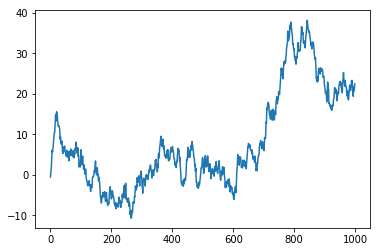

In [12]:
import matplotlib.pyplot as plt
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data
data = data.cumsum()
data
data.plot()
plt.show()

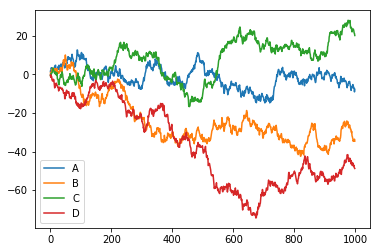

In [13]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
data = data.cumsum()
data.plot()
plt.show()

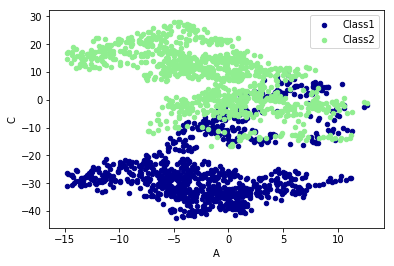

In [19]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()